# Linear regression From Scratch

## 1. What is linear regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The simplest form, simple linear regression, involves one independent variable and one dependent variable, where the goal is to find the best-fitting straight line through the data points. This line, often called the regression line, can be used to predict the value of the dependent variable based on the value of the independent variable. The equation of the line is typically written as:

$$ y = mx + b $$

where:
- $ (y) $ is the dependent variable,
- $ (x) $ is the independent variable,
- $ (m) $ is the slope, and
- $ (b) $ is the y-intercept.



## 2. Steps

### 2.1 **Data Collection**
Gather the data that includes the dependent variable $(y)$ and the independent variable(s) $x$.

In this notebook, we use a `scikit-learn` function just to generate some random data suitable for a regression task:


- **`datasets.make_regression`**: This function from `scikit-learn` generates w random regression problem.
- **`train_test_split`**: This function from `scikit-learn` splits the dataset into training and testing sets.


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

bias = 0
X, y, weight = datasets.make_regression(n_samples=100, n_features=1, noise=25, random_state=4, bias=bias, coef=True)

Sure! Here are the steps to perform linear regression, formatted with LaTeX:

1. **Data Collection**: Gather the data that includes the dependent variable (\( y \)) and the independent variable(s) (\( x \)).

2. **Data Preprocessing**: Clean the data by handling missing values, removing outliers, and normalizing or standardizing the data if necessary.

3. **Exploratory Data Analysis (EDA)**: Visualize the data to understand the relationships between variables. Scatter plots are commonly used to see the relationship between \( x \) and \( y \).

4. **Splitting the Data**: Divide the data into training and testing sets. The training set is used to build the model, and the testing set is used to evaluate its performance.

5. **Model Building**: Use the training data to fit the linear regression model. This involves finding the best-fitting line by minimizing the sum of the squared differences between the observed values and the values predicted by the line. The equation of the line is:

   $$ y = mx + b $$

6. **Model Evaluation**: Evaluate the model using the testing data. Common metrics include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and \( R^2 \) (R-squared).

7. **Prediction**: Use the model to make predictions on new data.

8. **Model Interpretation**: Interpret the coefficients (\( m \) and \( b \)) to understand the relationship between the independent and dependent variables.

9. **Model Refinement**: If necessary, refine the model by adding more features, transforming variables, or using regularization techniques to improve performance.

Would you like to dive deeper into any of these steps?

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

## Make data proper for regression


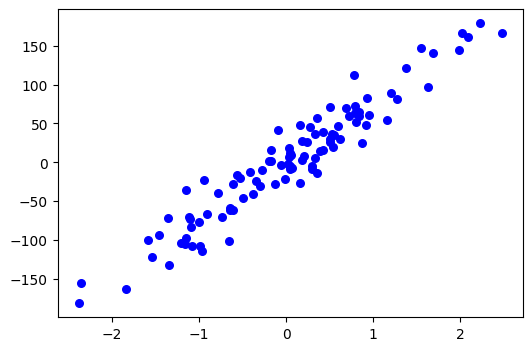

In [69]:
fig = plt.figure(figsize=(6,4))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

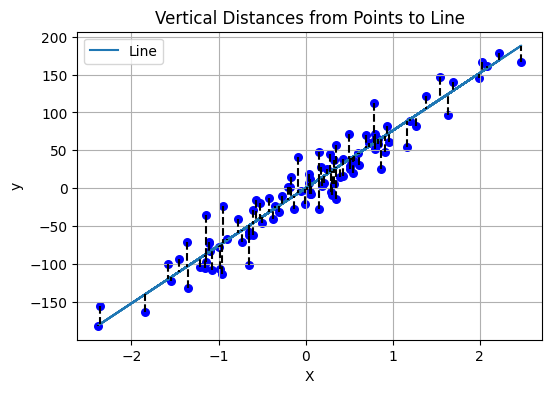

In [70]:

w = weight

# Function to calculate the y-coordinate on the line for w given x
def y_on_line(w, bias, x):
    return (w*x + bias) 

# Plot the line

y_vals = (w*X + bias)
plt.figure(figsize=(6,4)) 
plt.plot(X, y_vals, label='Line')

for x_point, y_point in zip(X,y):
    x_point = x_point[0]
    y_line = y_on_line(w, bias, x_point)
    
    plt.scatter(x_point, y_point, color = "b", marker = "o", s = 30)
    plt.plot([x_point, x_point], [y_point, y_line], 'k--')  # Dashed vertical line for the distance

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Vertical Distances from Points to Line')
plt.grid(True)
plt.show()


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (80, 1)
Testing data shape: (20, 1)


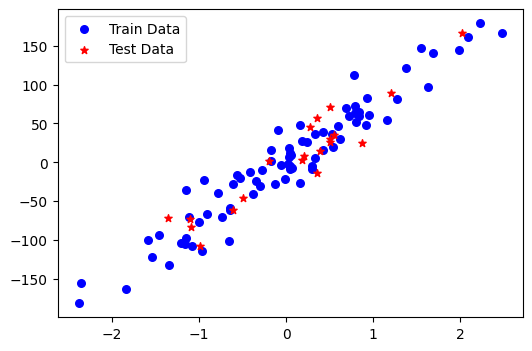

In [72]:
fig = plt.figure(figsize=(6,4))
plt.scatter(X_train[:, 0], y_train, color = "b", marker = "o", s = 30, label='Train Data')
plt.scatter(X_test[:, 0], y_test, color = "r", marker = "*", s = 30, label='Test Data')
plt.legend()
plt.show()


In linear regression, the goal is to find a line that can fit to this data

In [73]:
# This function calculates the Mean Squared Error (MSE) between the actual values (`y_test`) 
# and the predicted values (`predictions`).
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)


In [74]:
import numpy as np


class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=400):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.mse_list = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
            y_pred_line = self.predict(X)
            mse_train = mse(y_train, y_pred_line)
            self.mse_list.append(mse_train)
            if i % 50 and i < 200 == 0:
                fig = plt.figure(figsize=(4,2))
                m1 = plt.scatter(X_train[:, 0], y_train, color = "b", marker = "o", s = 30, label='Train Data')
                m2 = plt.scatter(X_test[:, 0], y_test, color = "r", marker = "*", s = 30, label='Test Data')
                plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
                plt.title(f'Epoch: {i} \n weight: {round(self.weights[0], 2)}  bias: {round(self.bias, 2)}\n mse: {round(mse_train,2)}')
                plt.show()
            

    def predict(self, X):
        
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred



In [75]:
reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)


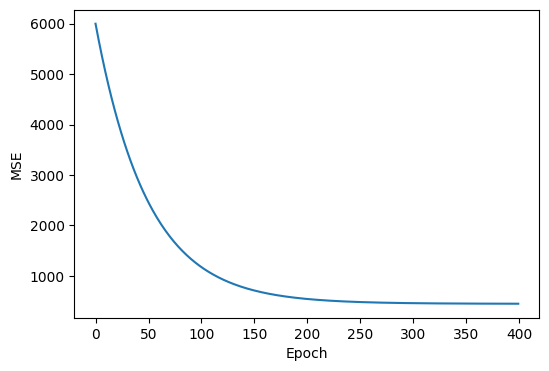

In [80]:
plt.figure(figsize=(6,4))
plt.plot(reg.mse_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [77]:
mse = mse(y_test, predictions)
print(mse)

477.1764971348663


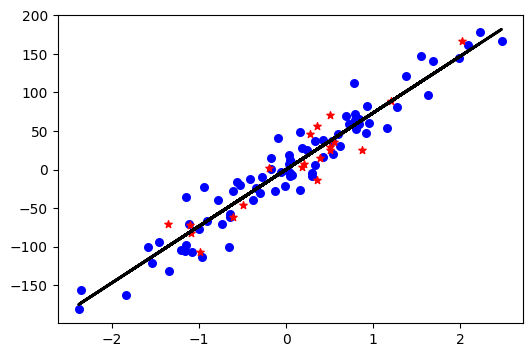

In [78]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(6,4))
m1 = plt.scatter(X_train[:, 0], y_train, color = "b", marker = "o", s = 30, label='Train Data')
m2 = plt.scatter(X_test[:, 0], y_test, color = "r", marker = "*", s = 30, label='Test Data')
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()


### Gradient Descent

- **Prediction**: 
  $$ \hat{y} = X \cdot \text{weights} + \text{bias} $$
  where \( \hat{y} \) is the predicted value.

- **Gradients**:
  - Weight gradient:
    $$ dw = \frac{1}{n_{\text{samples}}} \cdot X^T \cdot (\hat{y} - y) $$
  - Bias gradient:
    $$ db = \frac{1}{n_{\text{samples}}} \cdot \sum (\hat{y} - y) $$

- **Update Rules**:
  - Update weights:
    $$ \text{weights} = \text{weights} - \text{lr} \cdot dw $$
  - Update bias:
    $$ \text{bias} = \text{bias} - \text{lr} \cdot db $$

### Predict Method
```python
def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred
```
- **Prediction**:
  $$ \hat{y} = X \cdot \text{weights} + \text{bias} $$

This method uses the learned weights and bias to predict the target values for new data.
